<a href="https://colab.research.google.com/github/Marteldelfer/PISI3/blob/analise-exploratoria/Analise_exploratoria_TMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TMDB

Neste trabalhos usaremos uma base de dados do TMDB para resolver problemas usando Inteligência Artificial. O TMDB é uma base de dados online muito completa que trata sobre filmes.

Esta análise toma como base a metodologia KDD que é um processo de várias etapas, flexível e interativo, para descobrir padrões novos, válidos, úteis e fáceis de entender em um conjunto de dados.

Esta metodologia consiste em cinco etapas: Seleção,Pré-Processamento,Transformação, Mineiração dos dados, Interpretação. O desenvolvimento de cada etapa fica disposto a seguir


## Seleção

A fase de seleção no KDD (Knowledge Discovery in Databases — Descoberta de Conhecimento em Bases de Dados) é a parte em que os atributos para a análise são escolhidos.

Mas antes disso, se faz necessário a importação do dataset e listagem dos atributos.

In [2]:
''' Importando dependências '''

import pandas as pd


In [3]:
'''Lendo csv e listando atributos'''

# Caminho para o seu arquivo CSV
caminho_csv = 'tmdb.csv'

# Lê o CSV
df = pd.read_csv(caminho_csv)

print('Os atributos são listados abaixo')
print('=-'*30)
df.info()


Os atributos são listados abaixo
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    14999 non-null  int64  
 1   title                 14999 non-null  object 
 2   overview              14923 non-null  object 
 3   release_date          14961 non-null  object 
 4   runtime               14999 non-null  int64  
 5   genres                14931 non-null  object 
 6   original_language     14999 non-null  object 
 7   budget                14999 non-null  int64  
 8   revenue               14999 non-null  int64  
 9   popularity            14999 non-null  float64
 10  vote_average          14999 non-null  float64
 11  vote_count            14999 non-null  int64  
 12  cast                  14912 non-null  object 
 13  crew                  14932

Em seguida os filmes que ainda não foram lançados,ou seja, os filmes rumorados, em produção ou cancelados  são retirados. Pois não devem ser considerados nesta análise.



In [4]:
# prompt: Retire do dataset os filmes que tem o status diferente de 'Released' e salve em um csv chamado tmdb_v2.csv, no final mostre o número de linhas do csv salvo

# Filtra o DataFrame para incluir apenas filmes com status 'Released'
df_released = df[df['status'] == 'Released']

# Salva o DataFrame filtrado em um novo arquivo CSV
df_released.to_csv('tmdb_v2.csv', index=False)

# Mostra o número de linhas do novo arquivo CSV
print(f"O arquivo tmdb_v2.csv possui {len(df_released)} linhas.")


O arquivo tmdb_v2.csv possui 14900 linhas.


Em seguida, os atributos overview,poster_path,back_drop_path,cast, crew e tagline não farão parte da análise e portanto serão retirados.


In [5]:
df_v3 = pd.read_csv('tmdb_v2.csv')

df_v3 = df_v3.drop(columns=['overview','poster_path', 'backdrop_path', 'status', 'tagline','cast','crew','production_companies'])

df_v3.to_csv('tmdb_v3.csv', index=False)

df_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    14900 non-null  int64  
 1   title                 14900 non-null  object 
 2   release_date          14895 non-null  object 
 3   runtime               14900 non-null  int64  
 4   genres                14836 non-null  object 
 5   original_language     14900 non-null  object 
 6   budget                14900 non-null  int64  
 7   revenue               14900 non-null  int64  
 8   popularity            14900 non-null  float64
 9   vote_average          14900 non-null  float64
 10  vote_count            14900 non-null  int64  
 11  production_countries  14646 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.4+ MB



## Pré-processamento


Tendo escolhido os atributos a serem trabalhados, temos que ver quantos registros exitem com estes atributos recebendo valores nulos.

In [18]:
import pandas as pd

df_v3 = pd.read_csv('tmdb_v3.csv')

# Calcula a quantidade de valores nulos em cada atributo
null_counts = df_v3.isnull().sum()

# Imprime os resultados
print("Número de registros nulos em cada atributo:")
null_counts


Número de registros nulos em cada atributo:


,0
id,0
title,0
release_date,5
runtime,0
genres,64
original_language,0
budget,0
revenue,0
popularity,0
vote_average,0


Agora, os dados nulos serão retirados

In [22]:
# prompt: Gere um script que retire os dados nulos e salve no arquivo tmdb_v3.csv

import pandas as pd

df_v3 = pd.read_csv('tmdb_v3.csv')

# Remove linhas com valores nulos
df_v3_cleaned = df_v3.dropna()

# Salva o DataFrame limpo em um novo arquivo CSV
df_v3_cleaned.to_csv('tmdb_v3.csv', index=False)

# Exibe informações sobre o DataFrame limpo
df_v3_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14614 entries, 0 to 14899
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    14614 non-null  int64  
 1   title                 14614 non-null  object 
 2   release_date          14614 non-null  object 
 3   runtime               14614 non-null  int64  
 4   genres                14614 non-null  object 
 5   original_language     14614 non-null  object 
 6   budget                14614 non-null  int64  
 7   revenue               14614 non-null  int64  
 8   popularity            14614 non-null  float64
 9   vote_average          14614 non-null  float64
 10  vote_count            14614 non-null  int64  
 11  production_countries  14614 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1.4+ MB


count    14614.000000
mean         6.347384
std          1.188087
min          0.000000
1%           0.000000
25%          5.875000
50%          6.500000
75%          7.100000
99%          8.300000
max         10.000000
Name: vote_average, dtype: float64


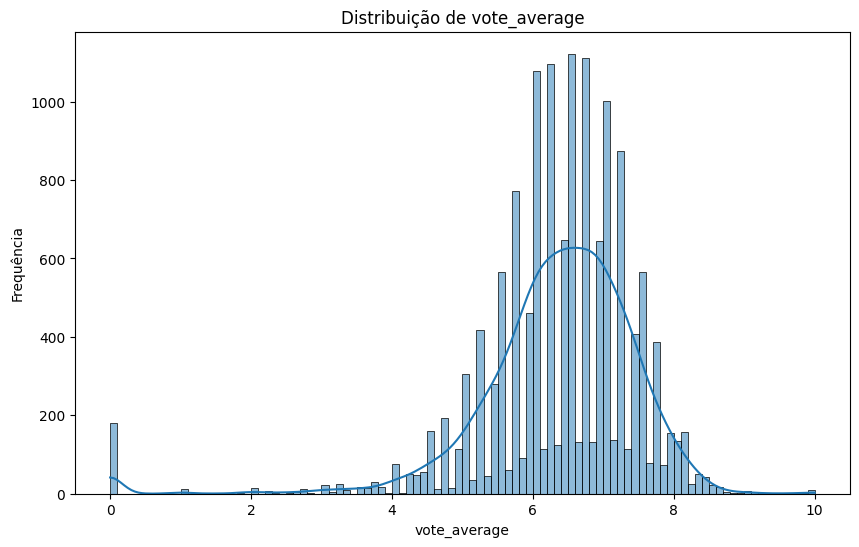

Moda: 6.8
1º percentil: 0.0
25º percentil: 5.875
50º percentil (Mediana): 6.5
75º percentil: 7.1
99º percentil: 8.3


In [27]:
# prompt: Como ver a distribuição gráfica do atributo vote_avarege tmbd_v3.csv. Me dê a média, moda, mediana e valores no 1 percentil, 25 percentil, 50 percentil, 75 percentil e 99 percentil

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregue o DataFrame
df_v3 = pd.read_csv('tmdb_v3.csv')

# Calcule as estatísticas descritivas
vote_average_stats = df_v3['vote_average'].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])

# Imprima as estatísticas
print(vote_average_stats)


# Crie o histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_v3['vote_average'], kde=True)
plt.title('Distribuição de vote_average')
plt.xlabel('vote_average')
plt.ylabel('Frequência')
plt.show()


# Calcule a moda
moda = df_v3['vote_average'].mode()[0]
print(f"Moda: {moda}")

# Imprima os valores nos percentis especificados
print(f"1º percentil: {vote_average_stats['1%']}")
print(f"25º percentil: {vote_average_stats['25%']}")
print(f"50º percentil (Mediana): {vote_average_stats['50%']}")
print(f"75º percentil: {vote_average_stats['75%']}")
print(f"99º percentil: {vote_average_stats['99%']}")


count    1.461400e+04
mean     1.530574e+07
std      3.412675e+07
min      0.000000e+00
1%       0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+07
99%      1.750000e+08
max      4.600000e+08
Name: budget, dtype: float64


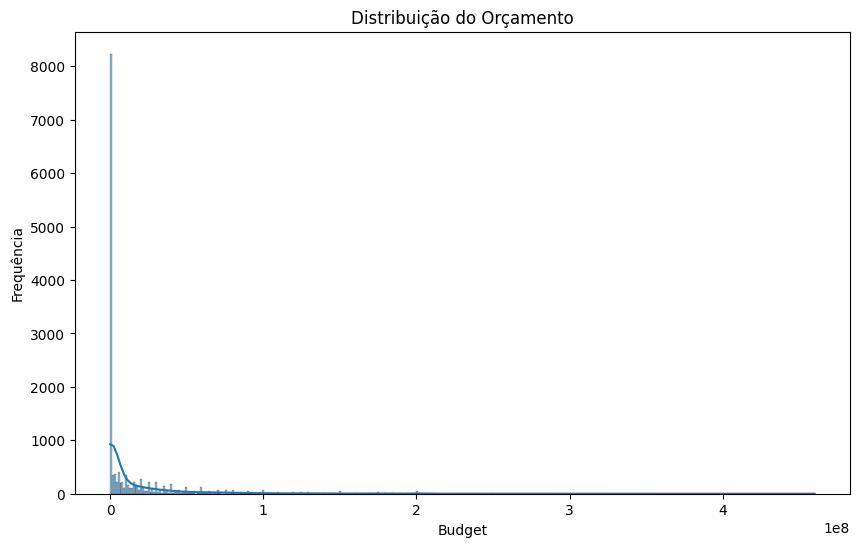

Moda: 0
1º percentil: 0.0
25º percentil: 0.0
50º percentil (Mediana): 0.0
75º percentil: 15000000.0
99º percentil: 175000000.0


In [24]:
# prompt: # prompt: Como ver a distribuição gráfica do atributo budget do tmbd_v3.csv. Me dê a média, moda, mediana e valores no 1 percentil, 25 percentil, 50 percentil, 75 percentil e 99 percentil

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregue o DataFrame
df_v3 = pd.read_csv('tmdb_v3.csv')

# Calcule as estatísticas descritivas para o atributo 'budget'
budget_stats = df_v3['budget'].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])

# Imprima as estatísticas
print(budget_stats)

# Crie o histograma para o atributo 'budget'
plt.figure(figsize=(10, 6))
sns.histplot(df_v3['budget'], kde=True)
plt.title('Distribuição do Orçamento')
plt.xlabel('Budget')
plt.ylabel('Frequência')
plt.show()

# Calcule a moda
moda = df_v3['budget'].mode()[0]
print(f"Moda: {moda}")

# Imprima os valores nos percentis especificados
print(f"1º percentil: {budget_stats['1%']}")
print(f"25º percentil: {budget_stats['25%']}")
print(f"50º percentil (Mediana): {budget_stats['50%']}")
print(f"75º percentil: {budget_stats['75%']}")
print(f"99º percentil: {budget_stats['99%']}")


count    1.461400e+04
mean     4.498509e+07
std      1.344043e+08
min      0.000000e+00
1%       0.000000e+00
25%      0.000000e+00
50%      3.761300e+04
75%      2.742841e+07
99%      6.898018e+08
max      2.923706e+09
Name: revenue, dtype: float64


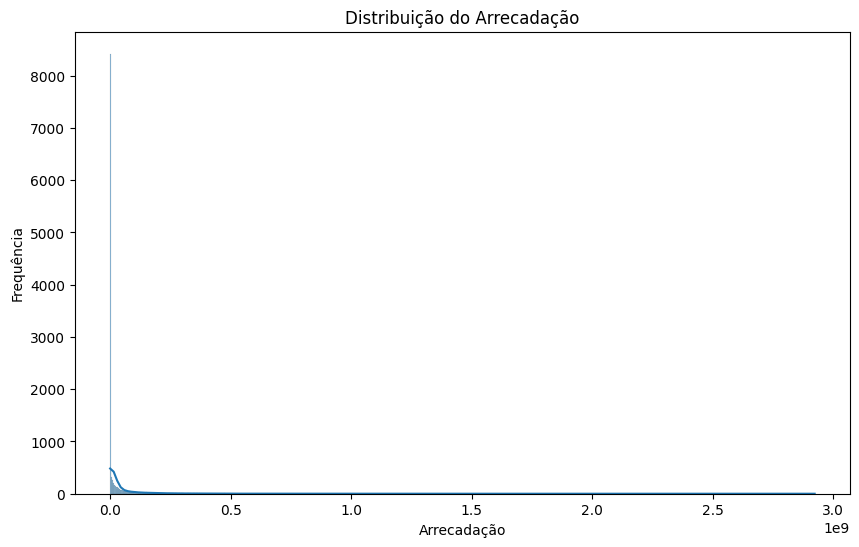

Moda: 0
1º percentil: 0.0
25º percentil: 0.0
50º percentil (Mediana): 37613.0
75º percentil: 27428410.75
99º percentil: 689801773.3199917


In [25]:
# prompt: # prompt: Como ver a distribuição gráfica do atributo revenue do tmbd_v3.csv. Me dê a média, moda, mediana e valores no 1 percentil, 25 percentil, 50 percentil, 75 percentil e 99 percentil

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregue o DataFrame
df_v3 = pd.read_csv('tmdb_v3.csv')

# Calcule as estatísticas descritivas para o atributo 'budget'
revenue_stats = df_v3['revenue'].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])

# Imprima as estatísticas
print(revenue_stats)

# Crie o histograma para o atributo 'budget'
plt.figure(figsize=(10, 6))
sns.histplot(df_v3['revenue'], kde=True)
plt.title('Distribuição do Arrecadação')
plt.xlabel('Arrecadação')
plt.ylabel('Frequência')
plt.show()

# Calcule a moda
moda = df_v3['revenue'].mode()[0]
print(f"Moda: {moda}")

# Imprima os valores nos percentis especificados
print(f"1º percentil: {revenue_stats['1%']}")
print(f"25º percentil: {revenue_stats['25%']}")
print(f"50º percentil (Mediana): {revenue_stats['50%']}")
print(f"75º percentil: {revenue_stats['75%']}")
print(f"99º percentil: {revenue_stats['99%']}")


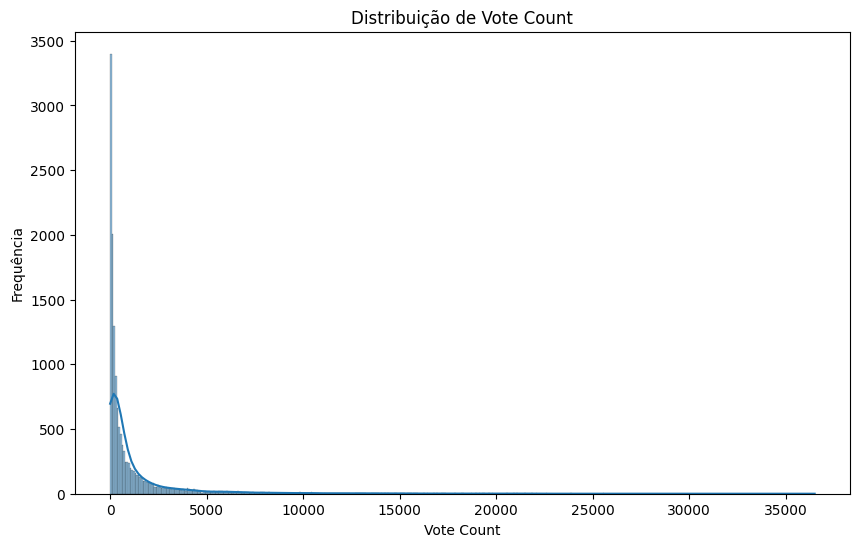

count    14614.000000
mean      1258.814630
std       2718.241073
min          0.000000
1%           0.000000
25%         93.000000
50%        304.000000
75%       1127.000000
99%      14242.050000
max      36504.000000
Name: vote_count, dtype: float64
Moda: 0
1º percentil: 0.0
25º percentil: 93.0
50º percentil (Mediana): 304.0
75º percentil: 1127.0
99º percentil: 14242.049999999985


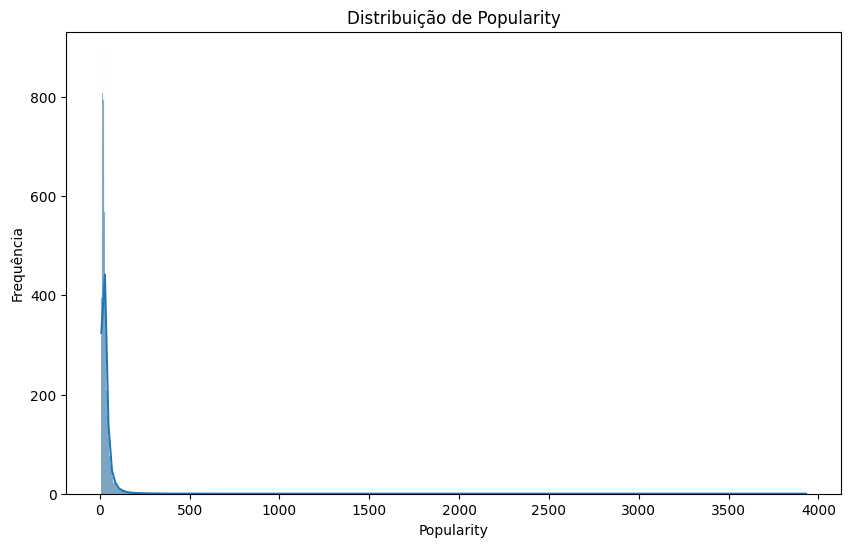

count    14614.000000
mean        34.115345
std         73.018639
min          9.086000
1%           9.671260
25%         17.050500
50%         23.381000
75%         33.961250
99%        183.018580
max       3930.216000
Name: popularity, dtype: float64
Moda: 16.201
1º percentil: 9.67126
25º percentil: 17.0505
50º percentil (Mediana): 23.381
75º percentil: 33.96125000000001
99º percentil: 183.01857999999854


In [26]:
# prompt: Como ver a distribuição gráfica do atributo vote_count, popularity tmbd_v3.csv. Me dê a média, moda, mediana e valores no 1 percentil, 25 percentil, 50 percentil, 75 percentil e 99 percentil

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregue o DataFrame
df_v3 = pd.read_csv('tmdb_v3.csv')

# Função para plotar a distribuição e calcular estatísticas
def plot_distribution(df, column_name, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], kde=True)
    plt.title(f'Distribuição de {title}')
    plt.xlabel(title)
    plt.ylabel('Frequência')
    plt.show()

    stats = df[column_name].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])
    print(stats)

    moda = df[column_name].mode()[0]
    print(f"Moda: {moda}")

    print(f"1º percentil: {stats['1%']}")
    print(f"25º percentil: {stats['25%']}")
    print(f"50º percentil (Mediana): {stats['50%']}")
    print(f"75º percentil: {stats['75%']}")
    print(f"99º percentil: {stats['99%']}")


# Plot da distribuição e estatísticas para 'vote_count'
plot_distribution(df_v3, 'vote_count', 'Vote Count')

# Plot da distribuição e estatísticas para 'popularity'
plot_distribution(df_v3, 'popularity', 'Popularity')
